## 1. Contexto del problema
El gobierno nacional está desarrollando políticas de acceso y uso de formas modernas de energía. En particular, está preocupado por el uso de leña como fuente de energía en algunas de las regiones del país.

Como parte de ese proceso, se ha identificado la necesidad de entender mejor la variabilidad en el **consumo per cápita de energía eléctrica**. En otras palabras, se quiere entender mejor **las razones por las que unas personas consumen más energía eléctrica que otras**.

Hay muchas posibes variables explicativas. Por ejemplo el clima, los ingresos, la actividad comercial, etc. Debido a la dificultad de recolectar al nivel de usuario esa información, se ha propuesto indagar las posibles explicaciones agrupadas por municipios. En esas condiciones, la pregunta por responder es: ¿Cuáles son las variables que explican que algunos municipios del país presentan un consumo de energía eléctrica per cápita muy diferente a otros?

## Librerias

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date, time, datetime
import matplotlib.pyplot as plt

# DataSets

In [49]:
url = "https://raw.githubusercontent.com/ogduartev/energyDataScience/main/data/towns/sample01.csv"
url1 ="https://raw.githubusercontent.com/ogduartev/energyDataScience/main/data/towns/sample02.csv"

df_dane = pd.read_csv(url,index_col=None,decimal=".")
df_vivi = pd.read_csv(url1,index_col=None,decimal=".")

df_dane.head()


,DPTO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,IMPORTANCIA,VALOR,PESO_MPAL,CONSUMOS_CANTIDAD
0,5,5001,Antioquia,Medellín,1,54530.676210,45.505823,0
1,5,5002,Antioquia,Abejorral,5,207.327284,0.173015,0
2,5,5004,Antioquia,Abriaquí,7,21.582463,0.018011,0
3,5,5021,Antioquia,Alejandría,6,100.796517,0.084115,0
4,5,5030,Antioquia,Amagá,4,410.099686,0.342228,0


In [50]:
df_vivi.head()

,DPTO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,POB_2012,POB_2015,POB_2020,ATITUD,CLIMA,PESO
0,11,11001,Bogotá Distrito Capital,Bogotá Distrito Capital,7571345,7878783,8380801,2640,Frío,0.162539
1,5,5001,Antioquia,Medellín,2393011,2464322,2569007,1405,Templado,0.051372
2,76,76001,Valle Del Cauca,Cali,2294653,2369821,2496442,926,Cálido seco,0.049261
3,8,8001,Atlántico,Barranquilla,1200513,1218475,1239518,24,Cálido húmedo,0.025772
4,13,13001,Bolívar,Cartagena de Indias,967103,1001755,1057445,1,Cálido húmedo,0.020761


<img src=https://media.geeksforgeeks.org/wp-content/uploads/20201213140551/Screenshot16151.png>

In [51]:
df = pd.merge(df_dane, df_vivi[["MPIO_CDPMP", "POB_2012", "POB_2015", "POB_2020", "ATITUD", "CLIMA", "PESO"]], on= "MPIO_CDPMP", how='left')
df=df.set_index("MPIO_CDPMP")
df = df.sort_values('MPIO_CDPMP')
df


,DPTO_CCDGO,DPTO_CNMBR,MPIO_CNMBR,IMPORTANCIA,VALOR,PESO_MPAL,CONSUMOS_CANTIDAD,POB_2012,POB_2015,POB_2020,ATITUD,CLIMA,PESO
MPIO_CDPMP,,,,,,,,,,,,,
5001,5,Antioquia,Medellín,1,54530.676210,45.505823,0,2393011,2464322,2569007,1405,Templado,0.051372
5002,5,Antioquia,Abejorral,5,207.327284,0.173015,0,19570,19290,18779,2125,Frío,0.000420
5004,5,Antioquia,Abriaquí,7,21.582463,0.018011,0,2290,2128,1870,1920,Templado,0.000049
5021,5,Antioquia,Alejandría,6,100.796517,0.084115,0,3575,3466,3278,1650,Templado,0.000077
5030,5,Antioquia,Amagá,4,410.099686,0.342228,0,28897,29555,30561,1392,Templado,0.000620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97889,97,Vaupés,Yavaraté,7,3.948081,0.813011,0,1251,1240,1218,97,Cálido húmedo,0.000027
99001,99,Vichada,Puerto Carreño,5,257.400063,26.318583,0,15012,15753,17031,51,Cálido húmedo,0.000322
99524,99,Vichada,La Primavera,6,131.433297,13.438762,0,13791,15342,18248,100,Cálido húmedo,0.000296


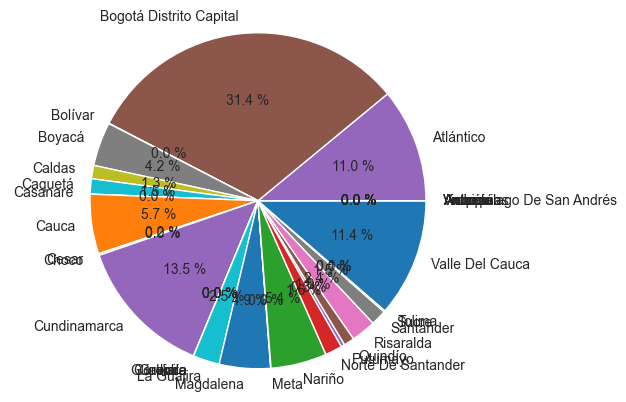

In [70]:
df1=df[["DPTO_CNMBR","CONSUMOS_CANTIDAD"]]
df1=df1.groupby(["DPTO_CNMBR"]).sum().reset_index()

plt.pie(df1["CONSUMOS_CANTIDAD"], labels=df1["DPTO_CNMBR"], autopct="%0.1f %%")
plt.axis("equal")
plt.show()